## Data Preprocessing For Modeling

In [22]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# read csv file to dataframe
df = pd.read_csv("C:/Users/chino/OneDrive/Desktop/DataSci_folder/DataScienceProjects_Mentorship/MY DATASETS/Telco-Customer-Churn.csv")
# set index as CustomerID
df = df.set_index('customerID')
print(df.shape)
df.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# correcting mismatching datatypes

# convert 'TotalCharges' values to numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# check for missing values after conversion
# missing_value = df['TotalCharges'].isna().sum()
# print(f"The number of missing values is {missing_value}.")   the number of missing values was 11

# fill missing values with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# check missing values
missing_value = df['TotalCharges'].isna().sum()
print(f"The number of missing values is {missing_value}.")

# check datatype 
print(df['TotalCharges'].dtype)

The number of missing values is 0.
float64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

### Feature Selection Evaluation Using Chi-Sqr and Correlation Metrics

In [ ]:
## Feature Selection Evaluation using Chi-Square Test

# copy to avoid modifying original
df_chi = df.copy()

# target encoding
df_chi['Churn_binary'] = df_chi['Churn'].map({'Yes':1, 'No':0})

# categorical columns
cat_cols = df_chi.select_dtypes(include='object').columns.drop('Churn')

# label encode categorical features
le = LabelEncoder()
for col in cat_cols:
    df_chi[col] = le.fit_transform(df_chi[col])

X_cat = df_chi[cat_cols]
y = df_chi['Churn_binary']

# Chi-square test
chi_scores, p_values = chi2(X_cat, y)

chi_df = pd.DataFrame({
    'Feature': cat_cols,
    'Chi_Square_Score': chi_scores,
    'p_value': p_values
}).sort_values(by='Chi_Square_Score', ascending=False)

print("\nChi-Square Feature Importance:")
print(chi_df)



Chi-Square Feature Importance:
             Feature  Chi_Square_Score        p_value
12          Contract       1115.780167  1.227941e-244
6     OnlineSecurity        551.611529  5.615882e-122
9        TechSupport        523.303866  8.086236e-116
7       OnlineBackup        230.086520   5.707869e-52
8   DeviceProtection        191.303140   1.651539e-43
2         Dependents        133.036443   8.876729e-31
13  PaperlessBilling        105.680863   8.661987e-25
1            Partner         82.412083   1.104764e-19
14     PaymentMethod         58.492250   2.040933e-14
5    InternetService          9.821028   1.725279e-03
4      MultipleLines          9.746921   1.796233e-03
11   StreamingMovies          8.235399   4.108113e-03
10       StreamingTV          7.490203   6.203556e-03
0             gender          0.258699   6.110156e-01
3       PhoneService          0.097261   7.551421e-01



Correlation with Churn:
Churn_binary      1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199037
tenure           -0.352229
Name: Churn_binary, dtype: float64


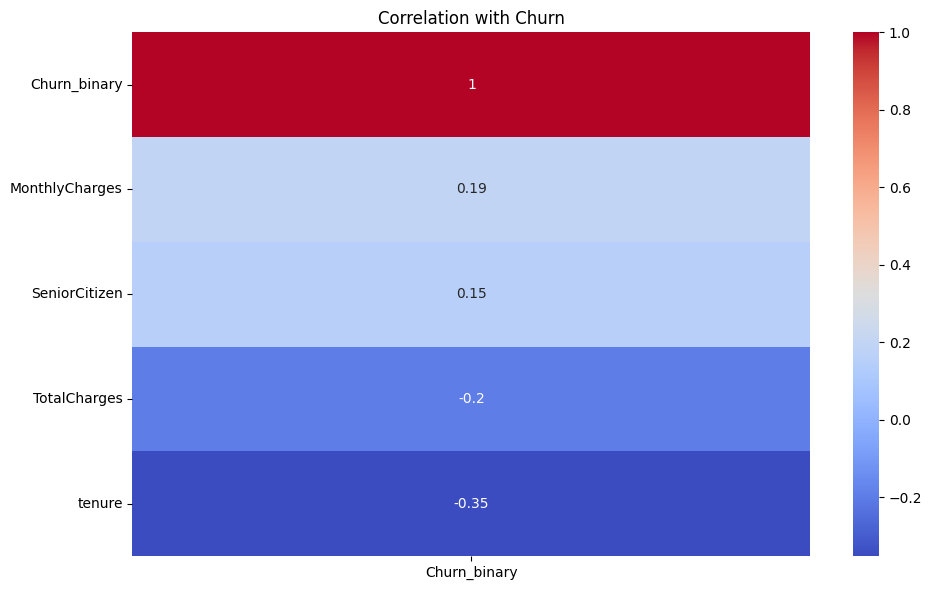

In [ ]:
## Feature Selection using Correlation

# declaring datatypes of column needed
num_cols = df.select_dtypes(include=['int64','float64']).columns

corr_df = df[num_cols].copy()
corr_df['Churn_binary'] = df['Churn'].map({'Yes':1, 'No':0})

corr_matrix = corr_df.corr()

print("\nCorrelation with Churn:")
print(corr_matrix['Churn_binary'].sort_values(ascending=False))

# heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['Churn_binary']].sort_values(by='Churn_binary', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Correlation with Churn')
plt.tight_layout()
plt.show()


In [10]:
# statistically significant categorical features
top_cat_features = chi_df.sort_values(by='Chi_Square_Score', ascending=False).head(7)['Feature'].tolist()
# print("Top 7 Categorical Features by Chi-Square:", top_cat_features)

# numerical features with meaningful correlation
significant_num = corr_matrix['Churn_binary'].abs().sort_values(ascending=False)
significant_num = significant_num[significant_num > 0.1].index.tolist()
significant_num.remove('Churn_binary')

print("\nSelected Categorical Features:", top_cat_features)
print("Selected Numerical Features:", significant_num)



Selected Categorical Features: ['Contract', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'Dependents', 'PaperlessBilling']
Selected Numerical Features: ['tenure', 'TotalCharges', 'MonthlyCharges', 'SeniorCitizen']


In [12]:
selected_features = top_cat_features + significant_num

X = df[selected_features]
y = df['Churn'].map({'Yes':1, 'No':0})

# one-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

### Train/Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Baseline Model Using Logistic Regression

In [16]:
log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
roc_value = roc_auc_score(y_test, y_prob)

print("\nLogistic Regression Performance")
print("Accuracy:", accuracy)
print("ROC AUC:", roc_value)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Logistic Regression Performance
Accuracy: 0.7877927608232789
ROC AUC: 0.8383631713554986

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



<Figure size 640x480 with 0 Axes>

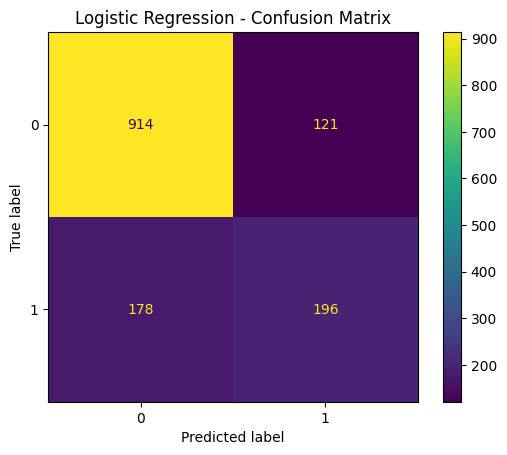

In [ ]:
# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred)

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_model.classes_)
disp.plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


#### Technical take:
| Metric                       | Meaning                               |
| ---------------------------- | ------------------------------------- |
| Accuracy 78.8%               | Strong Overall Performance           |
| ROC-AUC 0.838                | Very strong ranking power             |
| Recall (Churn = 1) = 0.52    | Catches 52% of churners               |
| Precision (Churn = 1) = 0.62 | Lower confidence in churn predictions |

#### Business take:

The model correctly identifies 914 loyal customers.

It successfully flags 196 churners.

It misses 178 churners (slightly worse than XGBoost).

It wrongly raised false alarms of Churners (121 FP).

In [17]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Coefficients:")
print(coef_df)



Logistic Regression Coefficients:
                                 Feature  Coefficient
15                  PaperlessBilling_Yes     0.425464
3                          SeniorCitizen     0.224741
2                         MonthlyCharges     0.017687
1                           TotalCharges     0.000284
0                                 tenure    -0.053330
13                  DeviceProtection_Yes    -0.111899
6     OnlineSecurity_No internet service    -0.213045
8        TechSupport_No internet service    -0.213045
10      OnlineBackup_No internet service    -0.213045
12  DeviceProtection_No internet service    -0.213045
14                        Dependents_Yes    -0.226297
11                      OnlineBackup_Yes    -0.270010
9                        TechSupport_Yes    -0.548683
7                     OnlineSecurity_Yes    -0.617330
4                      Contract_One year    -0.774304
5                      Contract_Two year    -1.340647


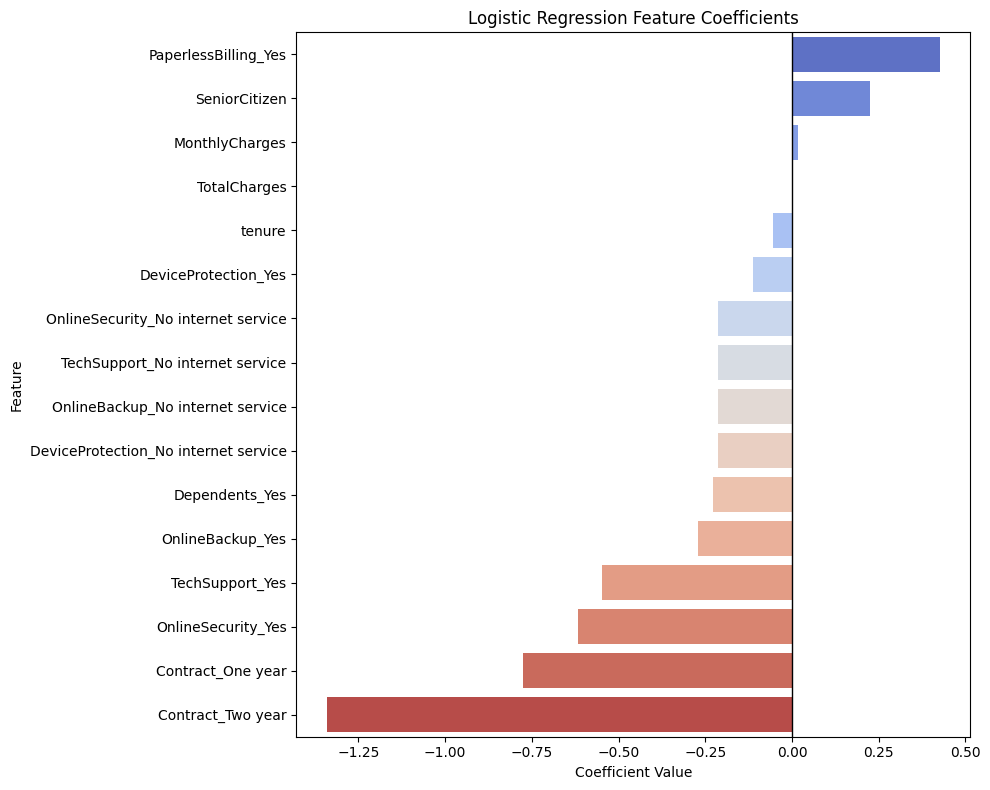

In [18]:
# Coefficient importance visuals
plt.figure(figsize=(10, 8))

sns.barplot(
    data=coef_df,
    y='Feature',
    x='Coefficient',
    orient='h',
    palette='coolwarm'
)

plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

plt.axvline(0, color='black', linewidth=1)  # reference line at 0
plt.tight_layout()
plt.show()


### Main Model Using XGBoost

In [ ]:
# Initialize model
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

# Evaluation
acc = accuracy_score(y_test, y_pred_xgb)
roc = roc_auc_score(y_test, y_pred_prob_xgb)

print(f"XGBoost Accuracy: {acc:.4f}")
print(f"XGBoost ROC-AUC: {roc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8070
XGBoost ROC-AUC: 0.8359

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.67      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[933 102]
 [170 204]]


<Figure size 640x480 with 0 Axes>

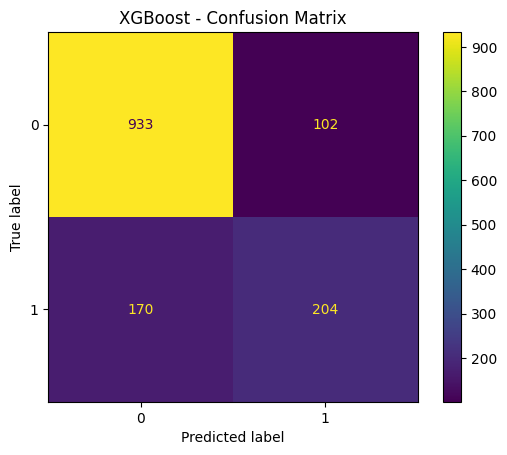

In [26]:
# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp.plot()
plt.title("XGBoost - Confusion Matrix")
plt.show()



##### Technical take:

| Metric                       | Meaning                               |
| ---------------------------- | ------------------------------------- |
| Accuracy 80.7%               | Strong overall performance(Slightly higher than LogisticRegression)            |
| ROC-AUC 0.836                | Excellent class separation            |
| Recall (Churn = 1) = 0.55    | Catches 55% of churners               |
| Precision (Churn = 1) = 0.67 | 67% of predicted churners are correct |


##### Business take:
The model correctly identifies most loyal customers (TN = 933)

It successfully flags 204 churners before they leave

It misses 170 churners → these are revenue leak risks

It wrongly flags 102 customers as churners (acceptable in retention campaigns)


                               Feature  Importance
5                    Contract_Two year    0.262936
8      TechSupport_No internet service    0.189480
6   OnlineSecurity_No internet service    0.172183
4                    Contract_One year    0.123107
0                               tenure    0.047041
7                   OnlineSecurity_Yes    0.041513
15                PaperlessBilling_Yes    0.032309
9                      TechSupport_Yes    0.028826
2                       MonthlyCharges    0.024946
1                         TotalCharges    0.018357
3                        SeniorCitizen    0.017915
11                    OnlineBackup_Yes    0.016687
14                      Dependents_Yes    0.014608
13                DeviceProtection_Yes    0.010092
10    OnlineBackup_No internet service    0.000000


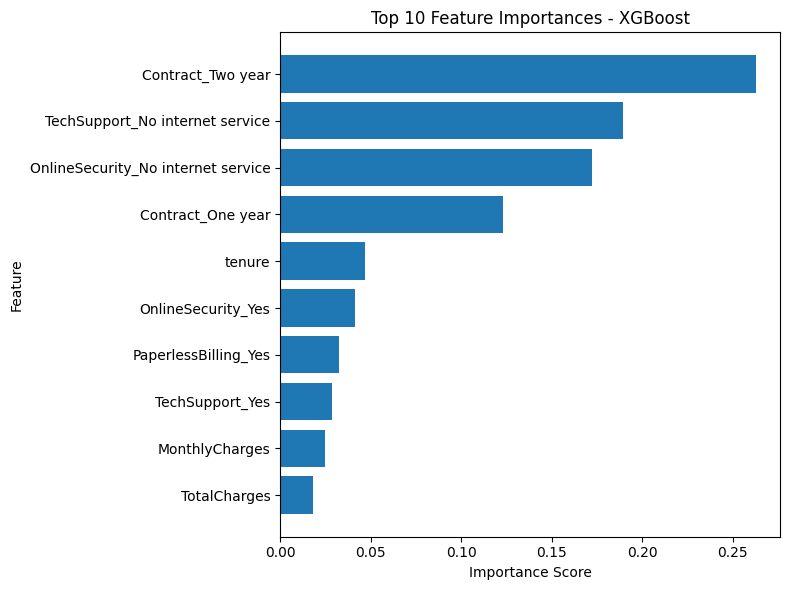

In [27]:
# Extract feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(15))

# Plot
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.title('Top 10 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Final Summary

We built two churn models: Logistic Regression and XGBoost.
While Logistic Regression provided interpretability, XGBoost delivered superior predictive power, higher churn detection, and fewer missed churn cases.
Therefore, XGBoost is recommended as the primary churn prediction engine, with Logistic Regression serving as the interpretability baseline.
This approach maximizes both business impact and decision transparency.